<h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e;'> &#x1F310; &nbsp; Styling, Links and Modules</h1>

---

#### [Keras](https://keras.rstudio.com/) & [Training Visualization](https://cran.r-project.org/web/packages/keras/vignettes/training_visualization.html) & [Getting started with imager](https://dahtah.github.io/imager/gettingstarted.html)
#### [Extended version. Python](https://olgabelitskaya.github.io/kaggle_flowers.html) & [Extended version. R](https://olgabelitskaya.github.io/kaggle_flowers_R.html)
#### [Github Repository](https://github.com/OlgaBelitskaya/deep_learning_projects/tree/master/DL_PP0) & [Colaboratory Version](https://colab.research.google.com/drive/1H2ArWH_1kYfkIoCbxleX-aHAozRVBAdB)

In [1]:
library(IRdisplay); library(repr)
library(tensorflow); library(keras)
library(imager); library(R6)

Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following object is masked from ‘package:IRdisplay’:

    display

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image



In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d'); 
a,h4 {color:slategray; font-family:Roboto; text-shadow:4px 4px 4px #aaa;}
span {color:black; font-family:Roboto; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#ff355e;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}     
</style>")

<h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e;'> &#x1F310; &nbsp; Data Exploration </h1>

In [3]:
fpath<-"../input/flower_images/flower_images"
flowers<-read.csv(paste0(fpath,"/flower_labels.csv"))
n<-nrow(flowers); head(flowers)

file,label
0001.png,0
0002.png,0
0003.png,2
0004.png,0
0005.png,0
0006.png,1


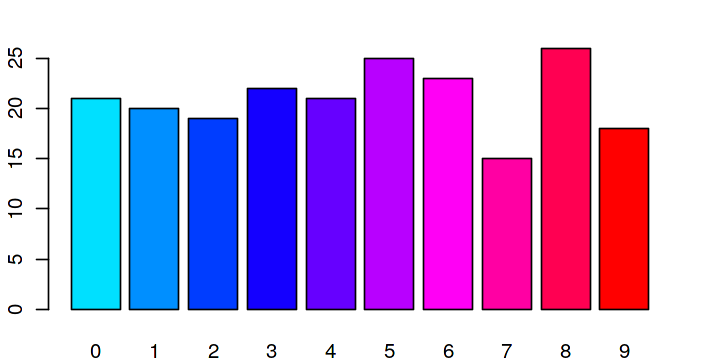

In [4]:
flower_labels<-as.matrix(flowers["label"])
options(repr.plot.width=6,repr.plot.height=3)
par(mar=c(2,2,2,2))
flower_labels[,1] %>% 
    table() %>% barplot(col=rainbow(10,start=.52,end=1))
flower_labels<-keras::to_categorical(flower_labels,10)

In [5]:
image_paths<-list.files(fpath,recursive=TRUE,full.names=TRUE)
image_paths<-image_paths[1:(length(image_paths)-1)]
image_paths[3:4]

[1] "../input/flower_images/flower_images/0003.png"
[2] "../input/flower_images/flower_images/0004.png"

[1]   1 128 128   3

[1] 128 128   1   4

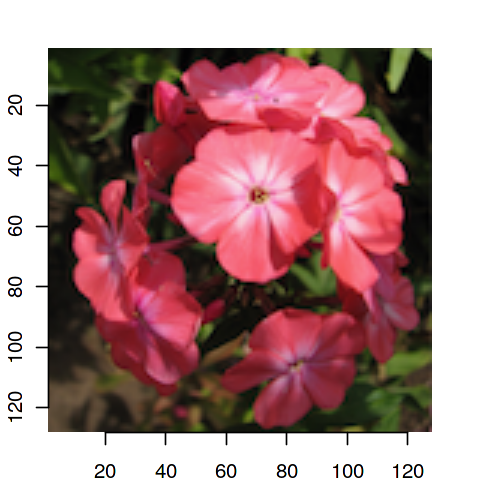

In [6]:
img_path<-paste0(fpath,"/0001.png")
img<-keras::image_load(img_path,target_size=c(128,128))
img<-image_to_array(img)/255
img<-array_reshape(img,c(1,128,128,3)); dim(img)
par(mar=c(2,2,2,2)); im<-load.image(img_path)
options(repr.plot.width=4,repr.plot.height=4)
dim(im); plot(im)

[1] 128 128

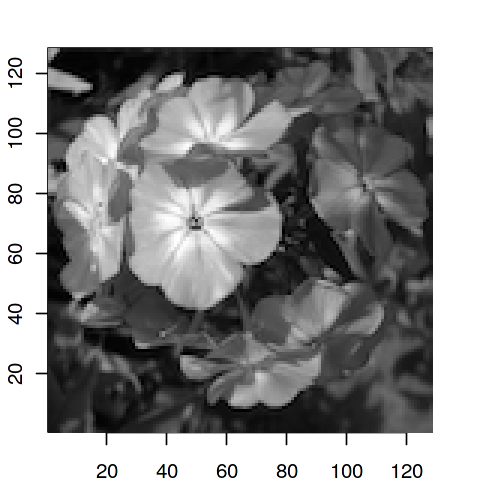

In [7]:
gray_img<-array_reshape(grayscale(img),c(128,128))
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2)); dim(gray_img)
image(c(1:128),c(1:128),gray_img,
      col=grey(seq(0,1,length=256)))

In [8]:
image_loading<-function(image_path) {
    image<-keras::image_load(image_path,target_size=c(128,128))
    image<-image_to_array(image)/255
    image<-array_reshape(image,c(1,dim(image)))
    return(image) }

In [9]:
flower_images<-lapply(image_paths,image_loading)
flower_images<-array_reshape(flower_images,c(-1,128,128,3))
c(dim(flower_images),dim(flower_labels))

[1] 210 128 128   3 210  10

In [10]:
dd<-c(-1,128*128*3); indices<-sample(1:n)
train_indices<-indices[1:round(.7*n)]
valid_indices<-indices[(round(.7*n)+1):round(.85*n)]
test_indices<-indices[(round(.85*n)+1):n]
flower_images<-array_reshape(flower_images,dd)
x_train<-flower_images[train_indices,]
x_train<-array_reshape(x_train,c(-1,128,128,3))
y_train<-flower_labels[train_indices,]
x_valid<-flower_images[valid_indices,]
x_valid<-array_reshape(x_valid,c(-1,128,128,3))
y_valid<-flower_labels[valid_indices,]
x_test<-flower_images[test_indices,]
x_test<-array_reshape(x_test,c(-1,128,128,3))
y_test<-flower_labels[test_indices,]
c(dim(x_train),dim(x_valid),dim(x_test),
  dim(y_train),dim(y_valid),dim(y_test))

[1] 147 128 128   3  31 128 128   3  32 128 128   3 147  10  31  10  32  10

<h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e;'> &#x1F310; &nbsp; Classification Models </h1>

In [11]:
mlp_model<-keras_model_sequential()
mlp_model %>%  
layer_dense(128,input_shape=c(128*128*3)) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%  
layer_dense(256) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%
layer_dense(512) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%
layer_dense(1024) %>%  
layer_activation("relu") %>%  
layer_dropout(.2) %>% 
layer_dense(10) %>%    
layer_activation("softmax")
mlp_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="adam",metrics="accuracy")
summary(mlp_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 128)                     6291584     
________________________________________________________________________________
activation_1 (Activation)           (None, 128)                     0           
________________________________________________________________________________
batch_normalization_1 (BatchNormali (None, 128)                     512         
________________________________________________________________________________
dense_2 (Dense)                     (None, 256)                     33024       
________________________________________________________________________________
activation_2 (Activation)           (None, 256)                     0           
________________________________________________________________________________
batch_normalization_2 (Batch

In [12]:
cb<-list(callback_model_checkpoint("mlp_best_flowers.h5",
                                   save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.75)) 
mlp_fit<-mlp_model %>%
    fit(x=array_reshape(x_train,dd),y=y_train,
        shuffle=T,batch_size=24,epochs=120,callbacks=cb,
        validation_data=list(array_reshape(x_valid,dd),y_valid))

Warning message in rbind(values, pad_data):
“number of columns of result is not a multiple of vector length (arg 2)”

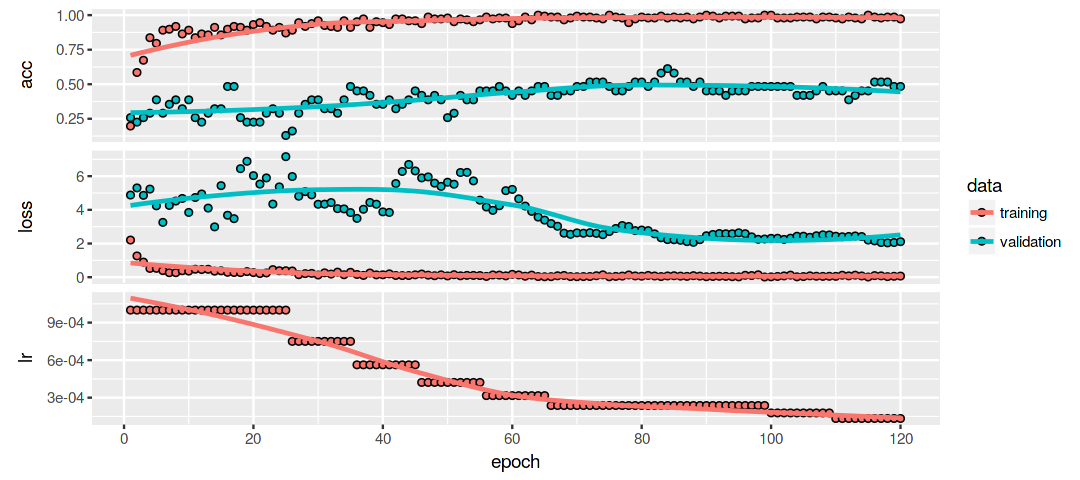

In [13]:
options(repr.plot.width=9,repr.plot.height=4)
plot(mlp_fit)

In [14]:
mlp_fit_df<-as.data.frame(mlp_fit)
mlp_fit_df[341:360,]

Warning message in rbind(values, pad_data):
“number of columns of result is not a multiple of vector length (arg 2)”

,epoch,value,metric,data
341,101,0.4838710,acc,validation
342,102,0.4838710,acc,validation
343,103,0.4838710,acc,validation
344,104,0.4193548,acc,validation
345,105,0.4193548,acc,validation
346,106,0.4193548,acc,validation
347,107,0.4516129,acc,validation
348,108,0.4838710,acc,validation
349,109,0.4516129,acc,validation
350,110,0.4516129,acc,validation


In [15]:
load_model_weights_hdf5(mlp_model,"mlp_best_flowers.h5")
mlp_model %>% 
    evaluate(array_reshape(x_test,dd),y_test)

$loss
[1] 1.979433

$acc
[1] 0.53125

In [16]:
cnn_model<-keras_model_sequential()
cnn_model %>%  
layer_conv_2d(filter=32,
              kernel_size=c(7,7),padding="same",
              input_shape=c(128,128,3)) %>%  
layer_activation("relu") %>%  
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.25) %>%
layer_conv_2d(filter=96,
              kernel_size=c(7,7),padding="same") %>% 
layer_activation("relu") %>%
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.25) %>%
layer_global_average_pooling_2d() %>%  
layer_dense(1024) %>%  
layer_activation("tanh") %>%  
layer_dropout(.25) %>%  
layer_dense(64) %>%  
layer_activation("tanh") %>%  
layer_dropout(.25) %>%
layer_dense(10) %>%    
layer_activation("softmax")
cnn_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="nadam",metrics="accuracy")
summary(cnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 128, 128, 32)            4736        
________________________________________________________________________________
activation_6 (Activation)           (None, 128, 128, 32)            0           
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 64, 64, 32)              0           
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 64, 64, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 64, 64, 96)              150624      
________________________________________________________________________________
activation_7 (Activation)   

In [17]:
cb<-list(callback_model_checkpoint("cnn_best_flowers.h5",
                                   save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.75))        
cnn_fit<-cnn_model %>%
    fit(x=x_train,y=y_train,shuffle=T,
        batch_size=16,epochs=150,callbacks=cb,
        validation_data=list(x_valid,y_valid))

Warning message in rbind(values, pad_data):
“number of columns of result is not a multiple of vector length (arg 2)”

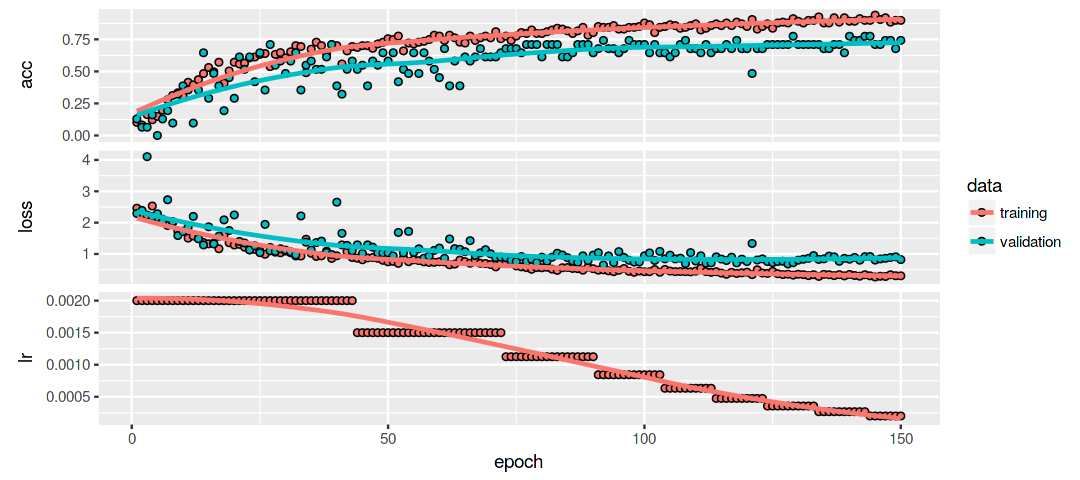

In [18]:
options(repr.plot.width=9,repr.plot.height=4)
plot(cnn_fit)

In [19]:
cnn_fit_df<-as.data.frame(cnn_fit)
cnn_fit_df[431:450,1:4]

Warning message in rbind(values, pad_data):
“number of columns of result is not a multiple of vector length (arg 2)”

,epoch,value,metric,data
431,131,0.7096774,acc,validation
432,132,0.7096774,acc,validation
433,133,0.7096774,acc,validation
434,134,0.7096774,acc,validation
435,135,0.6774194,acc,validation
436,136,0.6774194,acc,validation
437,137,0.7096774,acc,validation
438,138,0.7096774,acc,validation
439,139,0.6451613,acc,validation
440,140,0.7741936,acc,validation


In [20]:
load_model_weights_hdf5(cnn_model,"cnn_best_flowers.h5")
cnn_model %>% evaluate(x_test,y_test)

$loss
[1] 0.9369957

$acc
[1] 0.71875

In [21]:
rnn_model<-keras_model_sequential()
rnn_model %>% 
layer_lstm(196,return_sequences=T,
           input_shape=c(1,128*128*3)) %>%  
layer_lstm(196,return_sequences=T) %>%
layer_lstm(196) %>%
layer_dense(512) %>%
layer_activation("relu") %>%
layer_dense(10) %>%    
layer_activation("softmax")
rnn_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="adam",metrics="accuracy")
summary(rnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
lstm_1 (LSTM)                       (None, 1, 196)                  38689616    
________________________________________________________________________________
lstm_2 (LSTM)                       (None, 1, 196)                  308112      
________________________________________________________________________________
lstm_3 (LSTM)                       (None, 196)                     308112      
________________________________________________________________________________
dense_9 (Dense)                     (None, 512)                     100864      
________________________________________________________________________________
activation_11 (Activation)          (None, 512)                     0           
________________________________________________________________________________
dense_10 (Dense)            

In [22]:
cb<-list(callback_model_checkpoint("rnn_best_flowers.h5",
                                   save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.75))
dd2<-c(-1,1,128*128*3)
rnn_fit<-rnn_model %>%
    fit(x=array_reshape(x_train,dd2),y=y_train,
        shuffle=T,batch_size=64,epochs=150,callbacks=cb,
        validation_data=list(array_reshape(x_valid,dd2),y_valid))

Warning message in rbind(values, pad_data):
“number of columns of result is not a multiple of vector length (arg 2)”

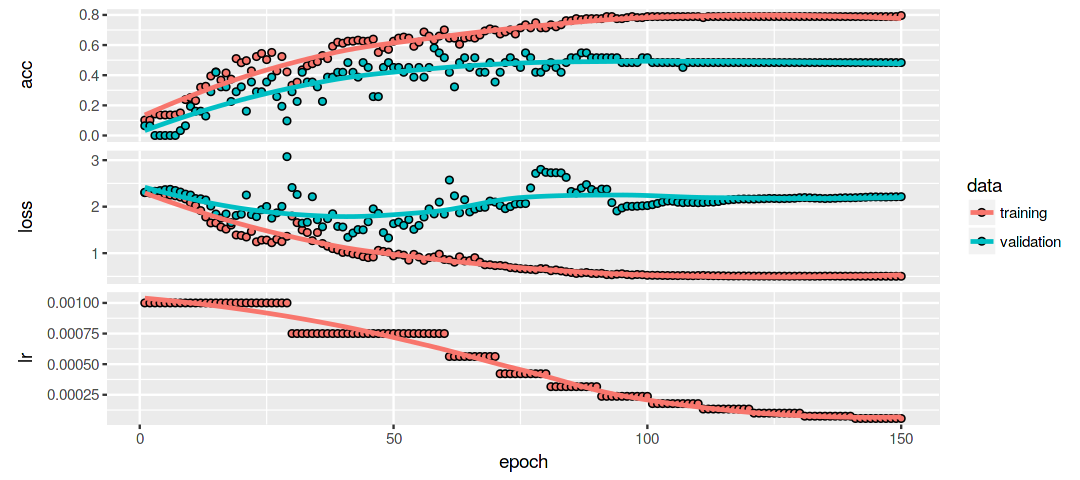

In [23]:
options(repr.plot.width=9,repr.plot.height=4)
plot(rnn_fit)

In [24]:
rnn_fit_df<-as.data.frame(rnn_fit)
rnn_fit_df[431:450,1:4]

Warning message in rbind(values, pad_data):
“number of columns of result is not a multiple of vector length (arg 2)”

,epoch,value,metric,data
431,131,0.483871,acc,validation
432,132,0.483871,acc,validation
433,133,0.483871,acc,validation
434,134,0.483871,acc,validation
435,135,0.483871,acc,validation
436,136,0.483871,acc,validation
437,137,0.483871,acc,validation
438,138,0.483871,acc,validation
439,139,0.483871,acc,validation
440,140,0.483871,acc,validation


In [25]:
load_model_weights_hdf5(rnn_model,"rnn_best_flowers.h5")
rnn_model %>% evaluate(array_reshape(x_test,dd2),y_test)

$loss
[1] 1.78429

$acc
[1] 0.34375